## IMPORTING LIBRARIES

In [386]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [387]:
train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### BASED ON THESE FEATURES WE'LL USE MACHINE LEARNING ALGORITHMS TO TRAIN OUR MACHINE AND TEST IT ON OUR TEST DATASET

In [388]:
# General info about the data set

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [389]:
#Checking for null values

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**AGE, EMBARKED AND CABIN COLUMN** contain null values, instead of dropping them straight away we'll try to fix them

### NUMERICAL FEATURES

In [390]:
num_df = train_df.select_dtypes(include = np.number)
print(num_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


There are **7 NUMERICAL COLUMNS** in the data set, We'll take a look at each of them and try to come out with some useful information.

### CATEGORICAL FEATURES

In [391]:
cat_df = train_df.select_dtypes(exclude = np.number )
print(cat_df.columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


There are **6 CATEGORICAL COLUMNS** in the data set

**--------------------------------------------------------------------------------------------------------------------------**

#### SURVIVED OR NOT

In [392]:
num_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Only 342 people that were on board survived and rest did not. Let's see how these numbers look on a pie chart 

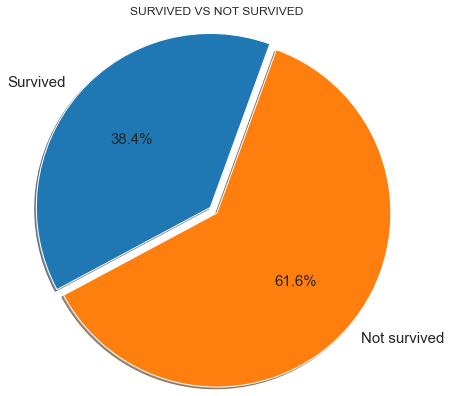

In [393]:
# Pie chart for survived vs not survived

fate = pd.Series()
fate['Survived'] = len(train_df[train_df['Survived'] == 1])
fate['Not survived'] = len(train_df[train_df['Survived'] == 0])


fate.plot.pie(radius = 2, autopct = '%1.1f%%', startangle = 70, textprops = {'size':15}, 
             explode = [0.1,0], shadow = True)

plt.xticks(size = 12, rotation = 10)
plt.ylabel('')
plt.title('SURVIVED VS NOT SURVIVED', pad = 90)
plt.show()

#### PC CLASS

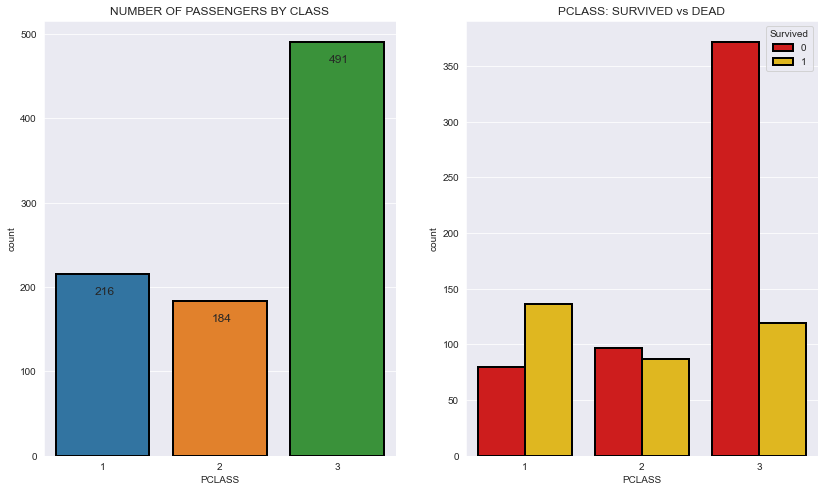

SUMMARY OF THE ABOVE ANALYSIS : 


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [394]:
pclass = train_df['Pclass'].value_counts()
pclass.sort_index(inplace = True)

sns.set_style('darkgrid')

f,ax=plt.subplots(1,2,figsize=(10,8))

#Pclass : Total ticket count according to each category
sns.barplot(x = pclass.index, y = pclass.values, lw = 2, edgecolor = 'black', ax = ax[0])
for i in range(len(pclass)):
    ax[0].annotate(pclass.iloc[i], xy = (i-0.07, pclass.iloc[i]-25), fontsize = 12)

ax[0].set_title('NUMBER OF PASSENGERS BY CLASS')
ax[0].set_ylabel('count')
ax[0].set_xlabel('PCLASS')

# Pclass : Survived vs not survived
sns.countplot('Pclass',hue='Survived',data= train_df, palette = 'hot', lw = 2, edgecolor = 'black',ax = ax[1])
ax[1].set_title('PCLASS: SURVIVED vs DEAD')
ax[1].set_xlabel('PCLASS')

plt.subplots_adjust(right = 1.2)
plt.show()

#Summary
print('SUMMARY OF THE ABOVE ANALYSIS : ')
pd.crosstab(train_df['Pclass'], train_df['Survived'], margins=True).style.background_gradient(cmap='summer_r')

We can clearly see that passengers with ticket class 1 (Upper class) were given high priority while rescuing, even though the number of passengers with ticket 3 (Lower class) was way higher than the rest. And not surprisingly, people belonging to this class suffered the most


#### SEX 

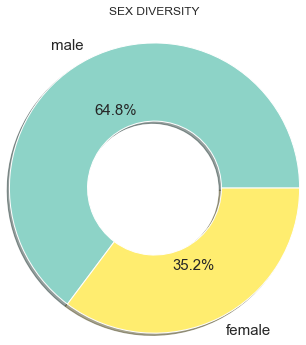

TOTAL MALES ON BOARD : 577
TOTAL MALES ON BOARD : 314


In [395]:
#Sex diversity using Donut chart
plt.figure(figsize = (5,8))
train_df['Sex'].value_counts().plot.pie(autopct = '%0.1f%%', 
radius = 1.3, wedgeprops = {'width' : 0.7} ,cmap = 'Set3',textprops = {'size' : 15,}, shadow = True )
plt.title('SEX DIVERSITY', y = 1.1)
plt.ylabel('')
plt.show()

print('TOTAL MALES ON BOARD :', train_df[train_df['Sex'] == 'male'].shape[0])
print('TOTAL MALES ON BOARD :', train_df[train_df['Sex'] == 'female'].shape[0])


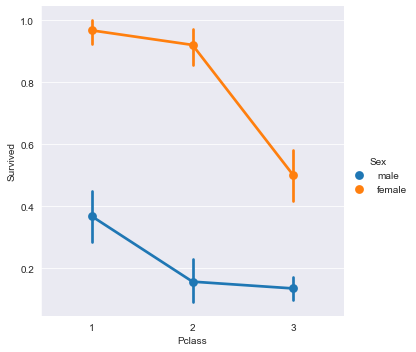

SUMMARY OF THE ABOVE ANALYSIS :


In [396]:
#Factorplot
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()
print('SUMMARY OF THE ABOVE ANALYSIS :')
pd.crosstab([train_df['Survived'],train_df['Sex']], train_df['Pclass'], margins=True).style.background_gradient(cmap='OrRd')





Looking at the **DONUT CHART** we can see that close to **65%** of people on board were males. However using the **FACTOR PLOT** and **CROSSTAB** we can infer that the survival rate for **FEMALES** was **VERY HIGH**, irrespective of the ticket class. Hence we can conclude that females were given top priority in rescue operation

#### AGE

We had seen earlier that **Age columns has 177 Null values**. To replace these Null values we'll fill them with mean values. But we can't assign a 4 year old with the mean age that is 29 years.

Hence we'll seggeragate the data according to salutations in **Name** column and then fill the null values according to their respective salutation mean value

In [397]:
train_df['Initial']=0
for i in train_df:
    train_df['Initial']=train_df['Name'].str.extract('([A-Za-z]+)\.')

In [398]:
print(train_df['Initial'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


There are some misspelled initials like **Mmme, Mlle** that stands for Miss. We'll replace them with Miss and do the same for others as well

In [399]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr'], inplace = True)

train_df.groupby('Initial')['Age'].mean()

Initial
Lady      48.000000
Master     4.574167
Miss      21.860000
Mr        33.022727
Mrs       35.871560
Name: Age, dtype: float64

In [400]:
#Filling Nan values in Age columns with Ceil values of the mean ages

train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Mr'), 'Age'] = 33
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Mrs'), 'Age'] = 36
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Master'), 'Age'] = 5
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Miss'), 'Age'] = 22
train_df.loc[(train_df['Age'].isnull()) & (train_df['Initial'] == 'Lady'), 'Age'] = 48

In [401]:
print('ARE THERE ANY NULL VALUES LEFT IN AGE COLUMN? :', train_df['Age'].isnull().any())

ARE THERE ANY NULL VALUES LEFT IN AGE COLUMN? : False


AVERAGE MALE AGE : 31
AVERAGE FEMALE AGE : 28
OLDEST PERSON : 80.0
YOUNGEST PERSON : 0.42


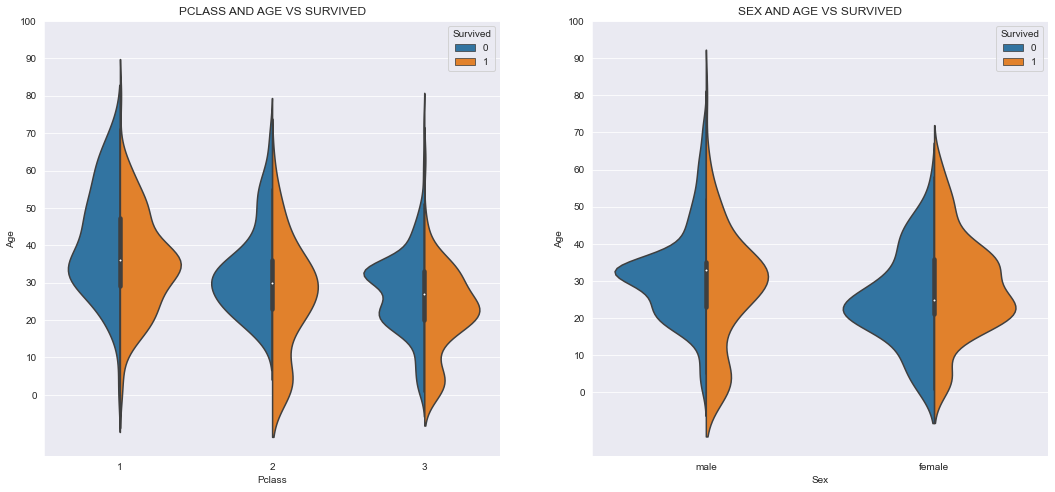

In [402]:
print('AVERAGE MALE AGE :',round(train_df[train_df['Sex'] == 'male']['Age'].mean()))
print('AVERAGE FEMALE AGE :',round(train_df[train_df['Sex'] == 'female']['Age'].mean()))
print('OLDEST PERSON :', train_df['Age'].max())
print('YOUNGEST PERSON :', train_df['Age'].min())


f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue = "Survived", data = train_df, split = True, ax = ax[0])
ax[0].set_title('PCLASS AND AGE VS SURVIVED')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue = "Survived", data = train_df, split = True, ax = ax[1])
ax[1].set_title('SEX AND AGE VS SURVIVED')
ax[1].set_yticks(range(0,110,10))
plt.show()


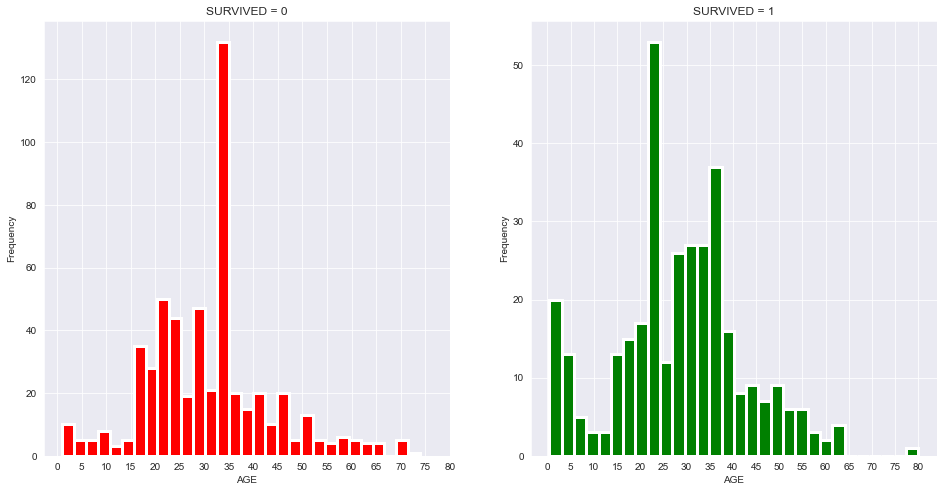

In [403]:
f, ax = plt.subplots(1,2,figsize = (16,8))

train_df[train_df['Survived']==0]['Age'].plot.hist(ax = ax[0], bins = 30, edgecolor = 'white', lw = 3, color='red')

ax[0].set_title('SURVIVED = 0')
ax[0].set_xlabel('AGE')

x1=list(range(0,85,5))
ax[0].set_xticks(x1)


train_df[train_df['Survived']==1]['Age'].plot.hist(ax = ax[1], bins = 30, edgecolor = 'white', color = 'green', lw = 3)

ax[1].set_title('SURVIVED = 1')
ax[1].set_xlabel('AGE')

x2=list(range(0,85,5))
ax[0].set_xticks(x1)
ax[1].set_xticks(x2)
plt.show()

We can see that most of the people that survived the accident were aged between **20-40** irrespective of the class. Also the survival rate of young children is **higher in classes 2 and 3** which may indicate that most of the young children belonged to these two classes

In terms of sex, both categories **suffered heavily**. The death rate of both males and females aged **20-30 is very high**. Also the survival chances of males **decreases with increase in age** 

The **oldest person with Age 80 years was saved** and so did most of the children

#### EMBARKED

<AxesSubplot:ylabel='Embarked'>

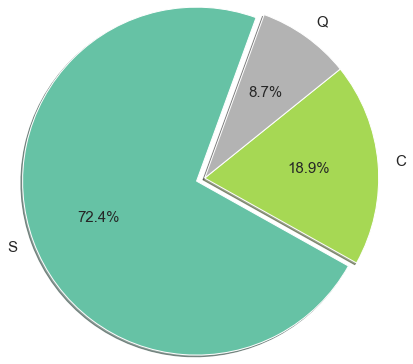

In [404]:
train_df['Embarked'].value_counts().plot.pie(radius = 2, autopct = '%1.1f%%', startangle = 70, textprops = {'size':15}, 
             explode = [0.1,0,0], shadow = True, cmap = 'Set2')

**Over 72%** of the passengers boarded from port S.

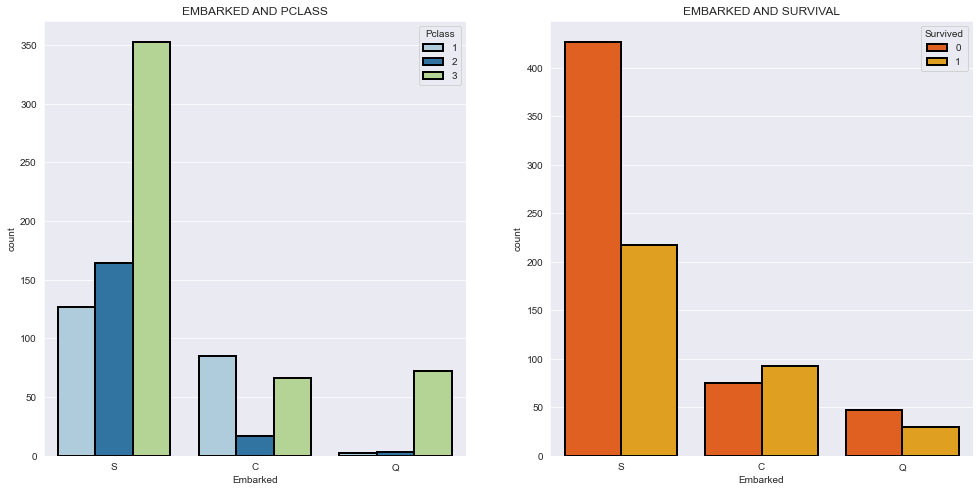

In [405]:
f, ax = plt.subplots(1,2,figsize = (12,8))
sns.countplot('Embarked', hue = 'Pclass', data = train_df, edgecolor = 'black', lw = 2, ax = ax[0], palette = 'Paired')
ax[0].set_title('EMBARKED AND PCLASS')
sns.countplot('Embarked', hue = 'Survived', data = train_df, edgecolor = 'black', lw = 2, ax = ax[1], palette = 'autumn')
ax[1].set_title('EMBARKED AND SURVIVAL')
plt.subplots_adjust(right = 1.2)

A major chunk of people belonging to **Class 3 boarded the ship from port S**. And hence the **death rate of people from port S is also very large**. Most of the people that boarded from port Q belonged to Class 3.

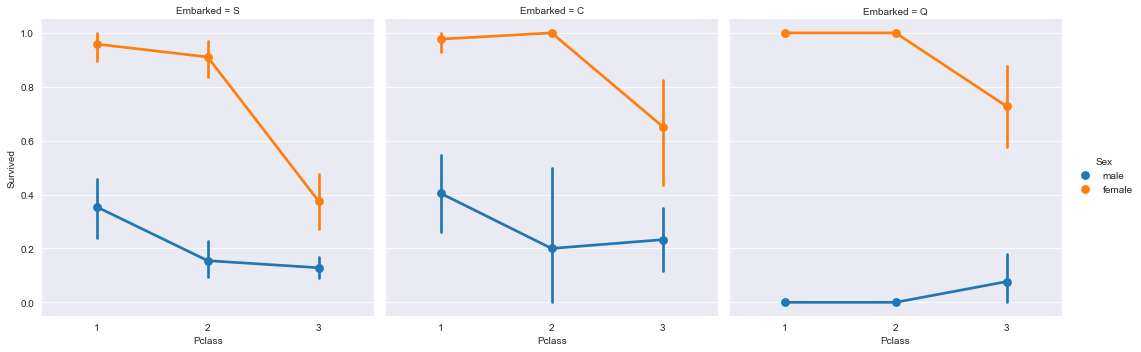

In [406]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = train_df)

The survival rate of **females belonging to Class 1 and 2 is very high** irrespective of the port from which they boarded the ship. Males boarding from Port Q suffered the most

In [407]:
# Filling Embarked Nan values

train_df['Embarked'].fillna('S', inplace = True)

train_df['Embarked'].isna().any()

False

### SibSp

This feature indicates whether a person is alone or has siblings, spouse on board. We'll see if SibSp has any effect on survival rate of a person

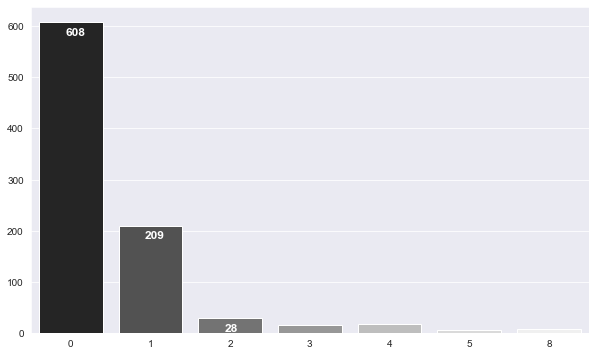

In [408]:
sibsp = train_df['SibSp'].value_counts()

plt.figure(figsize = (10,6))
sns.barplot(x = sibsp.index, y = sibsp.values, palette = 'Greys_r')
for i in range(len(sibsp)):
    plt.annotate(sibsp.iloc[i], xy = (i-0.07, sibsp.iloc[i]-25), fontsize = 12, color = 'white', weight = 'bold')
    
plt.show()

More than **600 people on board were traveling alone**. Whereas over 200 people were accompanied by **at least 1 more person**.


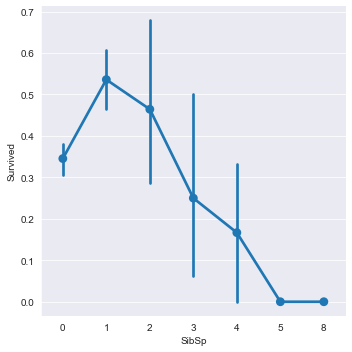

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [409]:
#SibSp vs Survived factorplot

sns.factorplot('SibSp', 'Survived', data = train_df)
plt.show()

#Crosstab SibSp vs Pclass
pd.crosstab(train_df['SibSp'], train_df['Pclass']).style.background_gradient(cmap='magma')

Survival rate of a **person traveling alone is close to 35%**. And survival rate of a **person accompanied by one more person is over 50%**. But as the number of **SibSp increases the survival rate decrease drastically** and for people with **SibSp in range 5-8 the chances of surviving is next to 0** 

The crosstab shows that **people with SibSp > 3 were all in Pclass3**. It is imminent that all the **large families belonged to Pclass 3**.

### PARCH

This feature represents if a person had parents and children on board

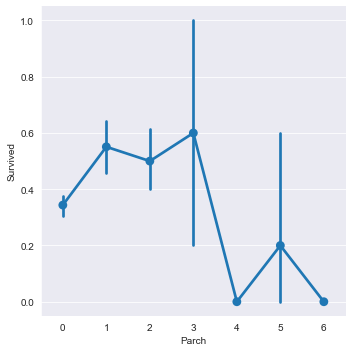

In [410]:
sns.factorplot('Parch', 'Survived', data = train_df)

The results here are also similar with what we saw in SibSp. A person having **Parch value below 3 has a good survival rate**.

### FARE

HIGHEST FARE : 512.3292
MINIMUM FARE : 0.0
AVERAGE FARE : 32


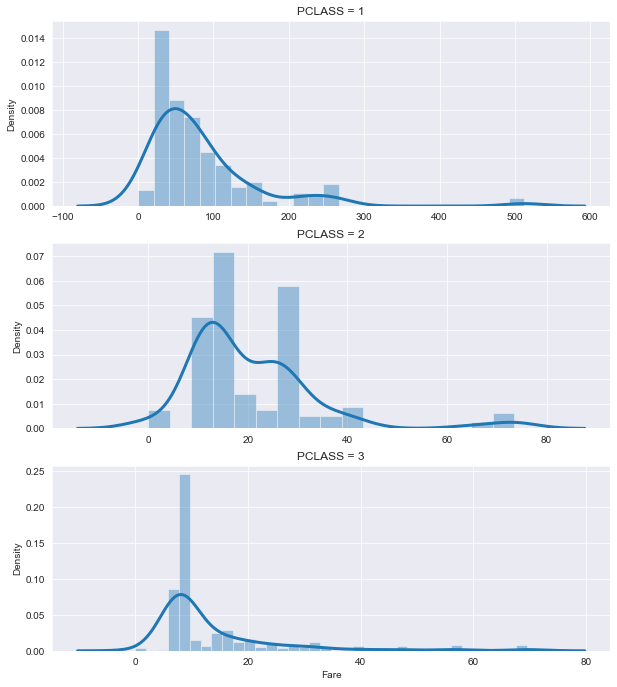

In [411]:
print('HIGHEST FARE :', train_df['Fare'].max())
print('MINIMUM FARE :', train_df['Fare'].min())
print('AVERAGE FARE :', round(train_df['Fare'].mean()))

f, ax = plt.subplots(3, figsize = (10,10))

sns.distplot(train_df[train_df['Pclass'] == 1]['Fare'], ax= ax[0],  kde_kws = dict(linewidth = 3))
ax[0].set_title('PCLASS = 1')
ax[0].set_xlabel('')

sns.distplot(train_df[train_df['Pclass'] == 2]['Fare'], ax= ax[1], kde_kws = dict(linewidth = 3))
ax[1].set_title('PCLASS = 2')
ax[1].set_xlabel('')


sns.distplot(train_df[train_df['Pclass'] == 3]['Fare'], ax= ax[2], kde_kws = dict(linewidth = 3))
ax[2].set_title('PCLASS = 3')



plt.subplots_adjust(top = 1)
plt.show()


The Fare of most of the ticket bought by people in **Pclass 1 was in range 0-100**. For **Pclass 2 the same value lies between 10-30**. Over 90% of this lies between **10-20 for people in Pclass 3**. This observation is hence in line with the socio-economic standard of the 3 classes. 

## FEATURE ENGINEERING

In order to determine features that are significant and directly correlate with the survival of a person we have to perform feature engineering techniques to extract or add new features by observing information from other features. There maybe some redundant features also that should be dropped in order to simplify our data set for predictive modeling.

### AGE_GROUP

Age is a continuous feature with its value ranging from 0 to 80. A continuous feature is problematic for machine learning algorigthms. In order to avoid that **we'll segeragate the age values in to 5 age groups such that each group contains 16 age values**.

**80/5 = 16**

In [412]:
#Replacing age values with age_group values

train_df['Age_group'] = 0

train_df.loc[(train_df['Age'] <= 16, 'Age_group')] = 1
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age_group'] = 2
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age_group' ] = 3
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age_group' ] = 4
train_df.loc[(train_df['Age'] > 64) & (train_df['Age'] <= 80), 'Age_group' ] = 5

#Renaming the age column
train_df.drop('Age', axis = 1, inplace = True)

train_df['Age_group'].value_counts().to_frame().style.background_gradient(cmap = 'Oranges')

,Age_group
2,382
3,325
1,104
4,69
5,11


### FAMILY_SIZE

We can combine SibSp and Parch features in to one feature which will indicate if the person was traveling alone or if he was with some other family member. 
Here a **value 0 will represent that the person was traveling alone**

In [413]:
train_df['Family_size'] = 0

train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']

train_df.drop(columns = ['SibSp','Parch'], axis = 0, inplace = True)

In [414]:
train_df['Family_size'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,Family_size
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


### FARE_RANGE

Fare is also a continuous feature and we'll convert it in to ordinal values using **pandas.qcut**.
**qcut** will equally split the fare values in to the specified number of bins. Here, we'll split the fares in to 5 bins or categories

In [415]:
train_df['Fare_range'] = pd.qcut(train_df['Fare'], 5)


In [416]:
train_df['Fare_range'].value_counts().to_frame().style.background_gradient(cmap = 'Greys_r')

,Fare_range
"(7.854, 10.5]",184
"(21.679, 39.688]",180
"(-0.001, 7.854]",179
"(39.688, 512.329]",176
"(10.5, 21.679]",172


In [417]:
#Categorising fare range in to ordinal values

train_df['Fare_range'] = 0

train_df.loc[train_df['Fare'] <=  7.854, 'Fare_range'] = 1
train_df.loc[(train_df['Fare'] >  7.854) & (train_df['Fare'] <=  10.5), 'Fare_range'] = 2
train_df.loc[(train_df['Fare'] >  10.5) & (train_df['Fare'] <=  21.679), 'Fare_range'] = 3
train_df.loc[(train_df['Fare'] >  21.679) & (train_df['Fare'] <=  39.688), 'Fare_range'] = 4
train_df.loc[(train_df['Fare'] >  39.688) & (train_df['Fare'] <=  512.329), 'Fare_range'] = 5

#Dropping fare feature
train_df.drop('Fare', inplace = True, axis = 1)

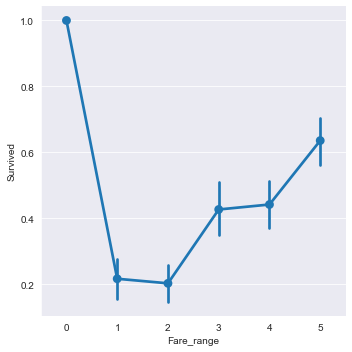

In [418]:
sns.factorplot('Fare_range', 'Survived', data = train_df)


As we saw earlier, the factorplot here proves that higher the fare more is the survival rate of a person

### SEX, EMBARKED, INITIAL

In [419]:
train_df['Sex'].replace(['male','female'], [0,1], inplace = True)
train_df['Embarked'].replace(['S','C','Q'], [1,2,3], inplace = True)
train_df['Initial'].replace(['Mr','Mrs','Miss','Master','Lady'], [1,2,3,4,5], inplace = True)

In [420]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked,Initial,Age_group,Family_size,Fare_range
0,1,0,3,"Braund, Mr. Owen Harris",0,A/5 21171,NaN,1,1,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,PC 17599,C85,2,2,3,1,5
2,3,1,3,"Heikkinen, Miss. Laina",1,STON/O2. 3101282,NaN,1,3,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,113803,C123,1,2,3,1,5
4,5,0,3,"Allen, Mr. William Henry",0,373450,NaN,1,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,211536,NaN,1,1,2,0,3
887,888,1,1,"Graham, Miss. Margaret Edith",1,112053,B42,1,3,2,0,4
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,W./C. 6607,NaN,1,3,2,3,4
889,890,1,1,"Behr, Mr. Karl Howell",0,111369,C148,2,1,2,0,4


### DROPPING IRRELEVANT FEATURES

Features like **PassengerId, Ticket, Cabin and Name** are redundant features here. 

**PassengerId** is not required since our aim is not to find if a particular person survived or not

**Cabin** contain a lot of null values and also many passengers may have shared a common cabin.

**Ticket** is any random string that cannot be categorised. 

**Name** is useless now since we have Initial feature to categorise a person


In [421]:
#Dropping Ticket, Cabin, Name

train_df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1, inplace = True)



print('FINAL DATA SET :')
train_df

FINAL DATA SET :


,Survived,Pclass,Sex,Embarked,Initial,Age_group,Family_size,Fare_range
0,0,3,0,1,1,2,1,1
1,1,1,1,2,2,3,1,5
2,1,3,1,1,3,2,0,2
3,1,1,1,1,2,3,1,5
4,0,3,0,1,1,3,0,2
...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,2,0,3
887,1,1,1,1,3,2,0,4
888,0,3,1,1,3,2,3,4
889,1,1,0,2,1,2,0,4


## HEATMAP CORRELATION

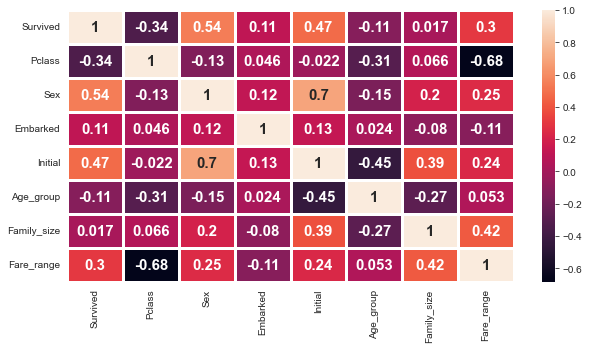

In [452]:
plt.figure(figsize = (10,8))
sns.heatmap(train_df.corr(), annot = True, lw = 3,  annot_kws = {'fontweight' : 'bold','size' : '15'})
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

***Positively correlated features :*** Sex, Initial, Embarked, Fare_range

***Negatively correlated features :*** Pclass, Age_group

## CONCLUSION AND FINDINGS

Over **60%** of the people that boarded the Titanic ship did not survive. Close to **500 passengers** on board belonged to lower class and over **75%** of them died. The survival rate of people belonging to upper class is very high which indicates that these people were given priority over others in rescue operations. 

Over **65%** of the passengers on board were males but the survival rate of females and children is much higher irrespective of the class from which they belonged to.

Most of the people that survived the accident were aged between **20-40**. But as the age increases, the chances of surviving decreases significantly. Although the oldest person on the ship was an **80 year old man** who did survive the accident.

Port of Southampton was the most busiest port of all with over **650 people** boarding the ship from there. Most of the people that boarded from here belonged to lower class and hence port Southampton saw the most deaths as well

Over 600 people were traveling alone and over 200 people were accompanied by at least 1 more person. Most of the families on board were from lower class. Upper class passengers prefered to travel solo.

A person traveling alone had **35%** chance of survival. Whereas a person accompanied by one more person had **50%** chance of being saved. But this trend of survival starts to decrease as the number of people increase, such that a person accompanied by over 5-8 people had almost **0** chance of being saved.

**From the heatmap** we can finally conclude that females from upper class had a good chance of surviving the accident whereas people belonging to lower class having age above 40 had very minute chances of survivng